# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import joblib
import warnings
warnings.filterwarnings('ignore')

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
# Load data
url = 'https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

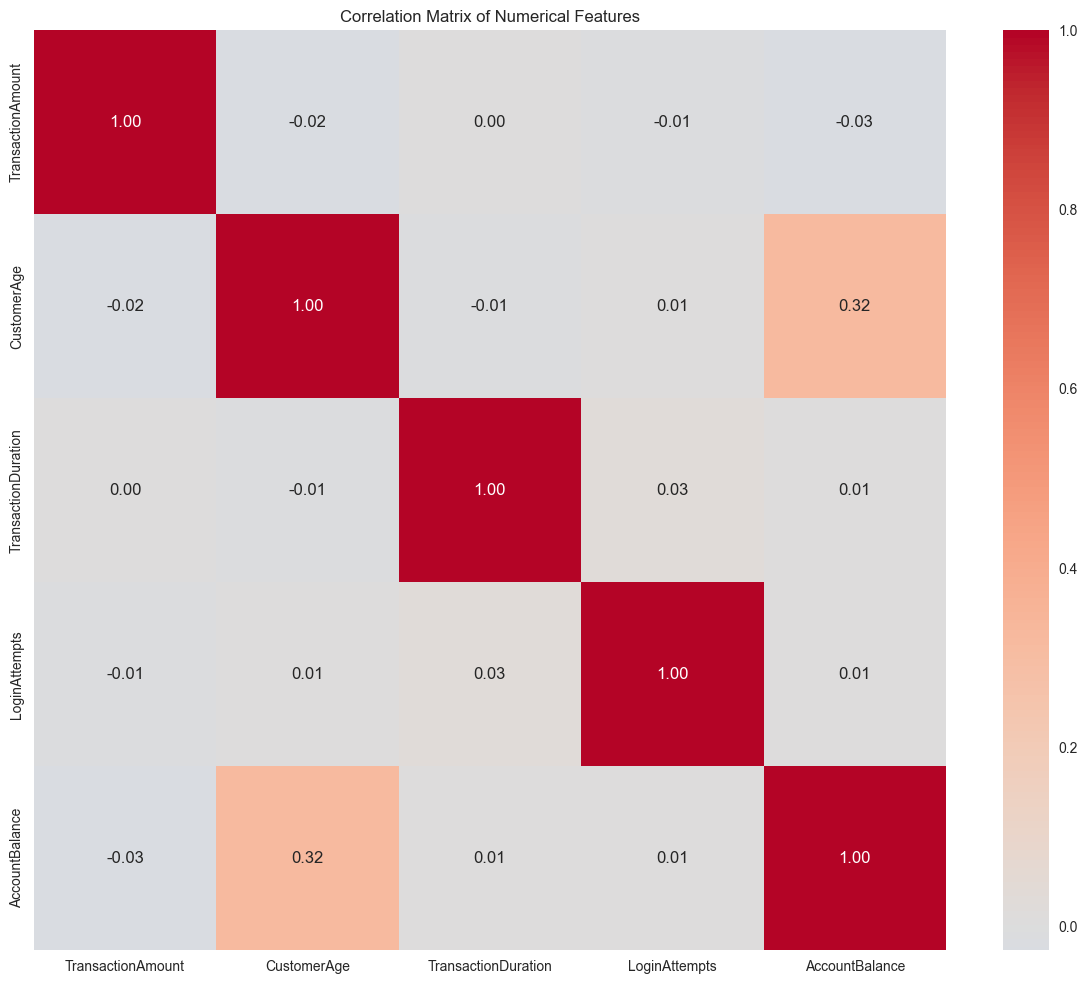

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
numerical_cols = df.select_dtypes(include = [np.number]).columns.tolist()
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize = (12, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', center = 0, fmt = '.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

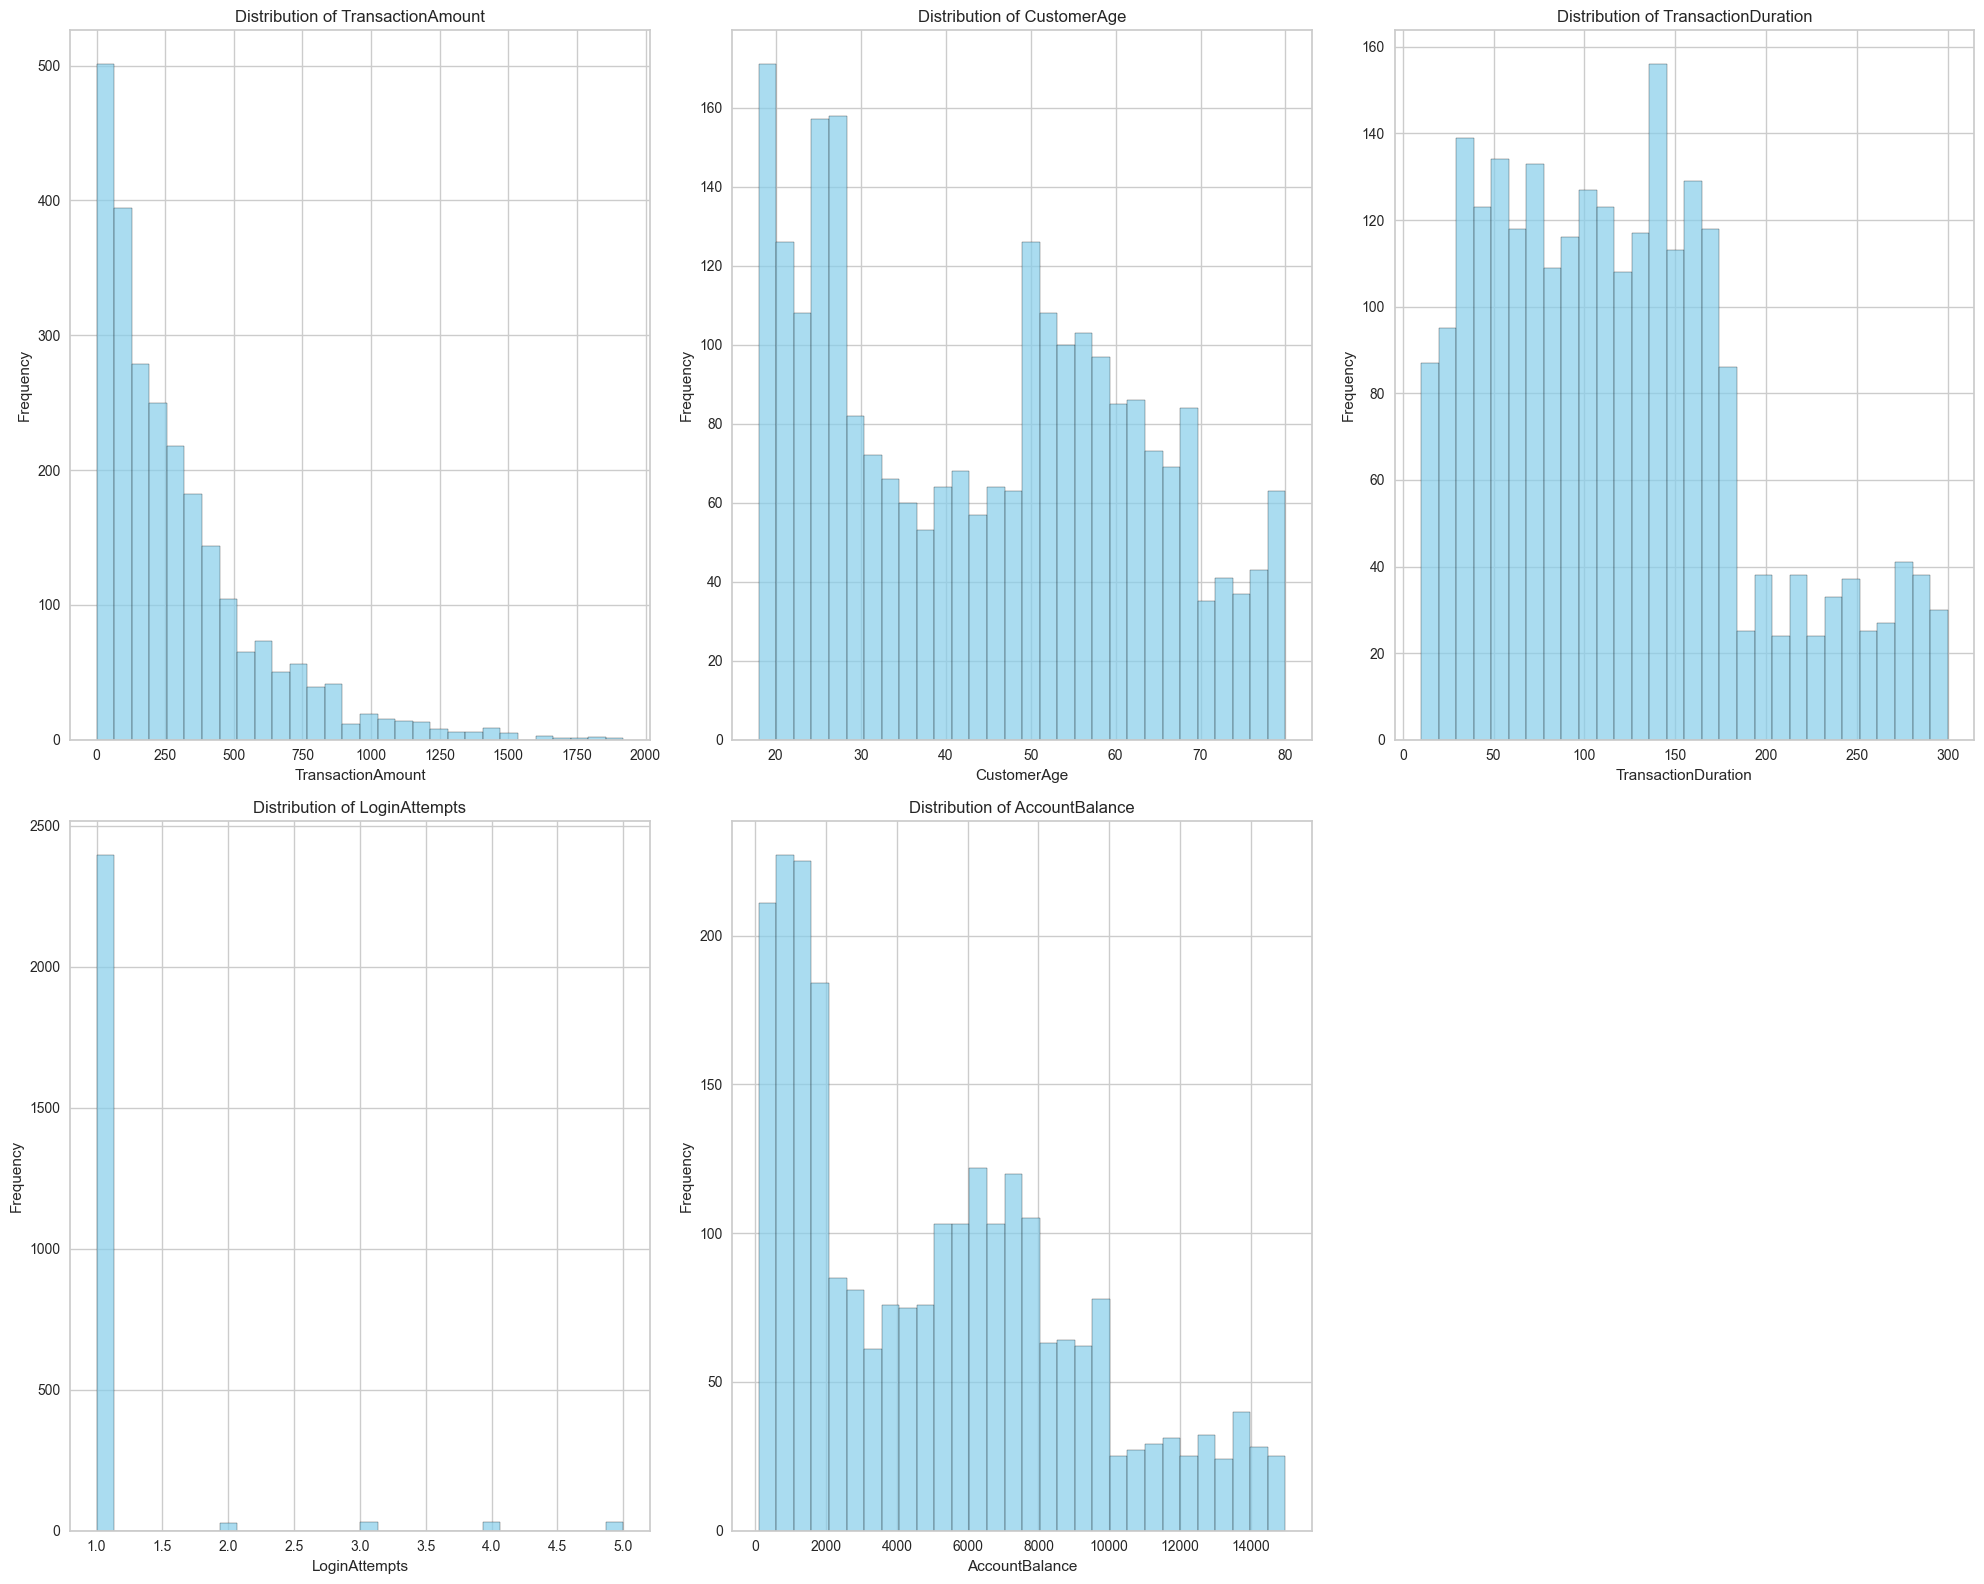

In [ ]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 16))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        axes[i].hist(df[col].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

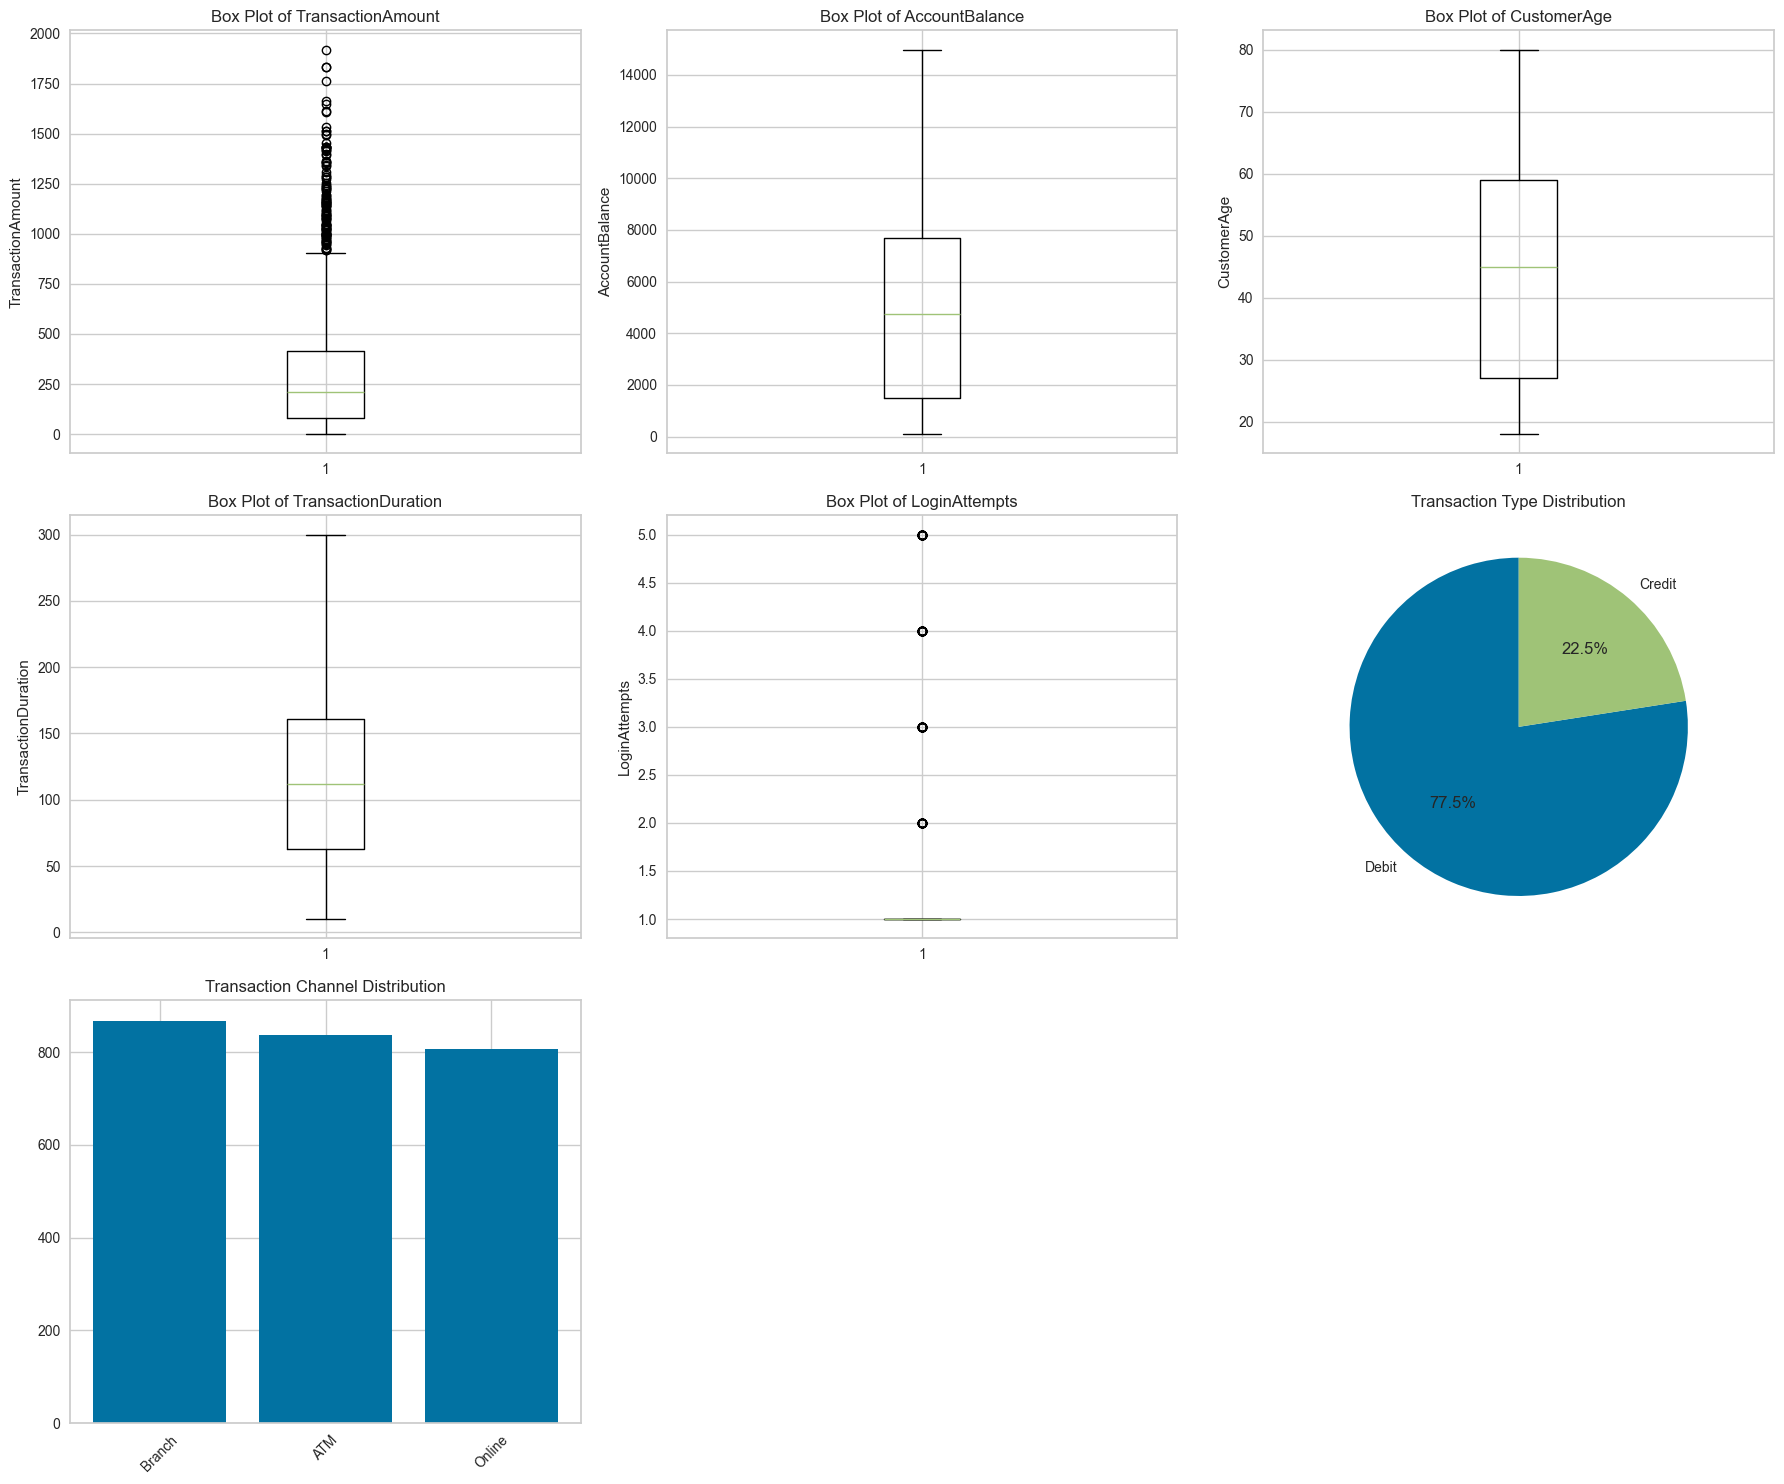

In [ ]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
# Box plots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.ravel()

key_numerical_cols = ['TransactionAmount', 'AccountBalance', 'CustomerAge', 
                     'TransactionDuration', 'LoginAttempts']

for i, col in enumerate(key_numerical_cols):
    if i < len(axes):
        axes[i].boxplot(df[col].dropna())
        axes[i].set_title(f'Box Plot of {col}')
        axes[i].set_ylabel(col)

# Transaction patterns by type
axes[5].pie(df['TransactionType'].value_counts(), 
           labels=df['TransactionType'].value_counts().index, 
           autopct='%1.1f%%', startangle=90)
axes[5].set_title('Transaction Type Distribution')

# Transaction patterns by channel
axes[6].bar(df['Channel'].value_counts().index, df['Channel'].value_counts().values)
axes[6].set_title('Transaction Channel Distribution')
axes[6].tick_params(axis='x', rotation=45)

for j in range(7, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

In [10]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

21

In [11]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
numerical_features = df.select_dtypes(include = [np.number]).columns.tolist()

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,-0.970546,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,TX000002,AC00455,0.268963,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,TX000003,AC00019,-0.586526,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,TX000004,AC00070,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,TX000005,AC00411,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 08:06:39


In [12]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(columns = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID'])

In [13]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
categorical_features = df.select_dtypes(include = ['object']).columns.tolist()

encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,680,1,36,0,1.419862,0,-0.548393,-0.204629,-0.000315,105
1,0.268963,1178,1,15,0,1.307715,0,0.307960,-0.204629,2.218381,192
2,-0.586526,1262,1,23,2,-1.439874,3,-0.905207,-0.204629,-1.024091,41
3,-0.387294,818,1,33,2,-1.047361,3,-1.347656,-0.204629,0.886694,163
4,-0.972736,1939,0,1,2,NaN,3,1.121495,-0.204629,0.594263,16


In [14]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [15]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())

# imputasi kategorikal dengan modus
for col in categorical_features:
    df[col] = df[col].fillna(df[col].mode()[0])

print(df.head())

   TransactionAmount  TransactionDate  TransactionType  Location  Channel  \
0          -0.970546              680                1        36        0   
1           0.268963             1178                1        15        0   
2          -0.586526             1262                1        23        2   
3          -0.387294              818                1        33        2   
4          -0.972736             1939                0         1        2   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.419862                   0            -0.548393      -0.204629   
1     1.307715                   0             0.307960      -0.204629   
2    -1.439874                   3            -0.905207      -0.204629   
3    -1.047361                   3            -1.347656      -0.204629   
4     0.018031                   3             1.121495      -0.204629   

   AccountBalance  PreviousTransactionDate  
0       -0.000315                      105  
1 

In [16]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [17]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_val = df[col].median()

    # ganti outlier dengan median
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), 
                       median_val, 
                       df[col])

In [18]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [19]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2514.000000,2514.000000,2514.000000,2514.000000,2514.00000,2514.000000,2514.000000,2514.000000,2.514000e+03,2514.000000,2514.000000
mean,-0.153976,1256.328958,0.787987,21.284010,1.01074,-0.003069,1.530231,0.000702,-2.046294e-01,-0.000193,180.889021
std,0.722221,725.581982,0.437042,12.397534,0.83084,0.994836,1.150477,0.994014,1.052146e-14,0.995102,103.956287
min,-1.017881,0.000000,0.000000,0.000000,0.00000,-1.495947,0.000000,-1.561745,-2.046294e-01,-1.286100,0.000000
25%,-0.734076,628.250000,1.000000,11.000000,0.00000,-0.991288,0.250000,-0.805299,-2.046294e-01,-0.922221,91.250000
50%,-0.295362,1256.500000,1.000000,21.000000,1.00000,0.018031,2.000000,-0.105944,-2.046294e-01,-0.097334,181.000000
75%,0.212062,1884.750000,1.000000,32.000000,2.00000,0.803056,3.000000,0.593411,-2.046294e-01,0.648772,272.000000
max,2.050618,2485.000000,2.000000,43.000000,3.00000,1.980594,4.000000,2.577295,-2.046294e-01,2.531190,360.000000


findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFourSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFiveSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmsy10'] not

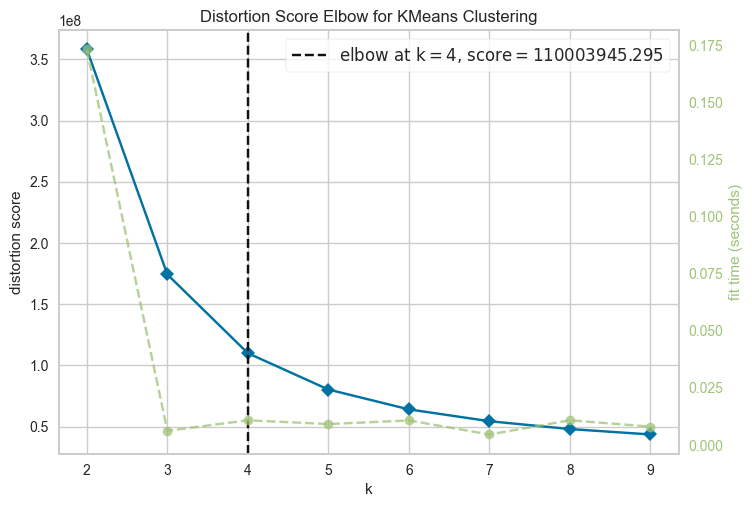

Optimal number of clusters: 4


In [20]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
model = KMeans(random_state = 42)
visualizer = KElbowVisualizer(model, k = (2, 10))
visualizer.fit(df)
visualizer.show()
plt.show()

optimal_k = visualizer.elbow_value_
print(f"Optimal number of clusters: {optimal_k}")

In [ ]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# fit model ke data
kmeans.fit(df)

# simpan label cluster ke dataframe
df['cluster'] = kmeans.labels_

Jalankan cell code ini untuk menyimpan model kamu.

In [22]:
# Menyimpan model menggunakan joblib
# import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [23]:
# Menghitung dan menampilkan nilai Silhouette Score.
X = df.drop('cluster', axis=1)

score = silhouette_score(X, df['cluster'])
score

0.49878470326606195

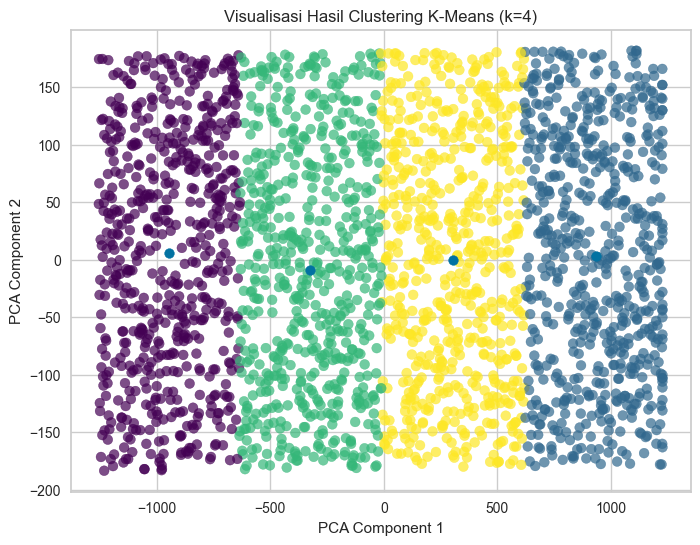

In [24]:
# Membuat visualisasi hasil clustering
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:,0], X_reduced[:,1], 
            c=df['cluster'], cmap='viridis', s=50, alpha=0.7)

centers_reduced = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_reduced[:,0], centers_reduced[:,1])

plt.title('Visualisasi Hasil Clustering K-Means (k=4)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [25]:
# Membangun model menggunakan PCA.
pca =PCA(n_components=2)
X_pca =pca.fit_transform(df.drop(columns = ['cluster']))

# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
data_final = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_pca.fit(data_final)

data_final['Cluster'] = kmeans_pca.labels_

In [26]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
desc_stats = df.groupby('cluster')[numerical_features].agg(['mean', 'min', 'max'])

desc_stats.columns = ['_'.join(col).strip() for col in desc_stats.columns.values]
desc_stats

,TransactionAmount_mean,TransactionAmount_min,TransactionAmount_max,CustomerAge_mean,CustomerAge_min,CustomerAge_max,TransactionDuration_mean,TransactionDuration_min,TransactionDuration_max,LoginAttempts_mean,LoginAttempts_min,LoginAttempts_max,AccountBalance_mean,AccountBalance_min,AccountBalance_max
cluster,,,,,,,,,,,,,,,
0,-0.149186,-1.015827,1.985656,-0.062513,-1.495947,1.980594,-0.036604,-1.561745,2.563023,-0.204629,-0.204629,-0.204629,-0.008093,-1.285856,2.522155
1,-0.184691,-1.017881,2.050618,0.004475,-1.495947,1.980594,0.025220,-1.561745,2.577295,-0.204629,-0.204629,-0.204629,0.029790,-1.279788,2.531190
2,-0.156585,-1.013945,2.028200,0.015339,-1.495947,1.980594,-0.009074,-1.561745,2.548750,-0.204629,-0.204629,-0.204629,-0.005942,-1.284661,2.512436
3,-0.125097,-1.017676,2.023990,0.029583,-1.495947,1.980594,0.022350,-1.561745,2.563023,-0.204629,-0.204629,-0.204629,-0.016991,-1.286100,2.520287


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: (Nasabah Konservatif dengan Transaksi Terkendali)**:
  - **Rata-rata Transaction Amount:** -0.1492
  - **Rata-rata Account Balance:** -0.0081 
  - **Rata-rata Customer Age:** -0.0625
  - **Rata-rata Transaction Duration:** -0.0366
  - **Analisis:** Cluster ini cenderung melakukan transaksi dengan nominal lebih rendah dari rata-rata, memiliki saldo relatif stabil, dan durasi transaksi sedikit lebih pendek. Karakteristiknya mencerminkan kehati-hatian dalam bertransaksi.

2. **Cluster 1: (Nasabah Aktif dengan Saldo Positif)**:
  - **Rata-rata Transaction Amount:** -0.1847
  - **Rata-rata Account Balance:** 0.0298 
  - **Rata-rata Customer Age:** 0.0045
  - **Rata-rata Transaction Duration:** 0.0252
  - **Analisis:** Cluster ini menonjol dengan saldo yang relatif lebih tinggi dari rata-rata, usia nasabah sedikit lebih muda, serta durasi transaksi lebih lama.

3. **Cluster 2: (Nasabah Moderat dengan Usia Lebih Tua)**:
  - **Rata-rata Transaction Amount:** -0.1566
  - **Rata-rata Account Balance:** -0.0059 
  - **Rata-rata Customer Age:** 0.0153
  - **Rata-rata Transaction Duration:** -0.0091
  - **Analisis:** Cluster ini rata-rata memiliki usia lebih tua, dengan nominal transaksi yang tetap rendah. Saldo mereka mendekati rata-rata, menunjukkan sifat moderat dan konservatif.

4. **Cluster 3: (Nasabah Spender dengan Transaksi Lebih Besar)**:
  - **Rata-rata Transaction Amount:** -0.1251 (tertinggi)
  - **Rata-rata Account Balance:** -0.0170
  - **Rata-rata Customer Age:** 0.0296
  - **Rata-rata Transaction Duration:** 0.0224
  - **Analisis:** Cluster ini memiliki kecenderungan bertransaksi dengan nominal lebih tinggi dibanding cluster lainnya, meski saldo cenderung di bawah rata-rata. Usia nasabah sedikit lebih tua dan perilakunya menunjukkan pola konsumtif.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [28]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df = df.rename(columns={'cluster': 'Target'})

In [29]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [30]:
# inverse dataset ke rentang normal untuk numerikal
df[numerical_features] = scaler.inverse_transform(df[numerical_features])

# tampilkan dataset yang sudah di-inverse
print("Dataset setelah inverse numerik:")
df.head()

Dataset setelah inverse numerik:


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,14.09,680,1,36,0,70.0,0,81.0,1.0,5112.21,105,2
1,376.24,1178,1,15,0,68.0,0,141.0,1.0,13758.91,192,2
2,126.29,1262,1,23,2,19.0,3,56.0,1.0,1122.35,41,3
3,184.50,818,1,33,2,26.0,3,25.0,1.0,8569.06,163,2
4,13.45,1939,0,1,2,45.0,3,198.0,1.0,7429.40,16,1


In [ ]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
for col in categorical_features:
    le = encoders[col]
    df[col] = le.inverse_transform(df[col].astype(int))
# tampilkan dataset yang sudah di-inverse
df.head()


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,2
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,2
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,3
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,2
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,45.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,1


In [ ]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
pd.set_option("display.max_columns", None) 
pd.set_option("display.width", 2000)        

desc_numeric = df.groupby('Target')[numerical_features].agg(['mean', 'min', 'max'])

desc_numeric.columns = ['_'.join(col).strip() for col in desc_numeric.columns.values]

desc_categorical = df.groupby('Target')[categorical_features].agg(lambda x: x.mode().iloc[0])

desc_stats = pd.concat([desc_numeric, desc_categorical], axis=1)

print("Analisis deskriptif gabungan (numerik + kategorikal):")
print(desc_stats.head())

Analisis deskriptif gabungan (numerik + kategorikal):
        TransactionAmount_mean  TransactionAmount_min  TransactionAmount_max  CustomerAge_mean  CustomerAge_min  CustomerAge_max  TransactionDuration_mean  TransactionDuration_min  TransactionDuration_max  LoginAttempts_mean  LoginAttempts_min  LoginAttempts_max  AccountBalance_mean  AccountBalance_min  AccountBalance_max      TransactionDate TransactionType      Location Channel CustomerOccupation PreviousTransactionDate
Target                                                                                                                                                                                                                                                                                                                                                                                                                                   
0                   254.068486                   0.86                 877.81         43.563607

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 0: (Nasabah Konservatif dengan Transaksi Terkendali)**:
  - **Rata-rata Transaction Amount:** 254.07
  - **Rata-rata Account Balance:** 5,081.90 
  - **Rata-rata Customer Age:** 43.56 tahun
  - **Rata-rata Transaction Duration:** 116.86 detik
  - **Analisis:** Cluster ini cenderung melakukan transaksi dengan nominal relatif kecil, saldo berada di kisaran rata-rata, dan durasi transaksi relatif singkat. Karakteristik ini menunjukkan pola transaksi yang hati-hati dan konservatif.
  - **Rekomendasi:** Tawarkan produk investasi rendah risiko atau tabungan berjangka untuk meningkatkan loyalitas.

2. **Cluster 1: (Nasabah Aktif dengan Saldo Positif)**:
  - **Rata-rata Transaction Amount:** 243.69
  - **Rata-rata Account Balance:** 5,229.53 
  - **Rata-rata Customer Age:** 44.76 tahun
  - **Rata-rata Transaction Duration:** 121.19 detik
  - **Analisis:** Cluster ini memiliki saldo paling tinggi dibanding cluster lain, dengan transaksi bernilai menengah dan durasi sedikit lebih lama. Hal ini menunjukkan kecenderungan aktif dalam menjaga saldo dan bertransaksi secara rutin.
  - **Rekomendasi:** Dorong penggunaan layanan premium (kartu kredit, paket investasi menengah-tinggi) karena mereka punya saldo yang sehat dan aktif bertransaksi.


3. **Cluster 2: (Nasabah Moderat dengan Usia Lebih Tua)**:
  - **Rata-rata Transaction Amount:** 251.91
  - **Rata-rata Account Balance:** 5,090.28 
  - **Rata-rata Customer Age:** 44.95 tahun
  - **Rata-rata Transaction Duration:** 118.79 detik
  - **Analisis:** Cluster ini memiliki rata-rata usia lebih tua, nominal transaksi cenderung stabil dengan saldo mendekati rata-rata. Karakteristiknya menggambarkan perilaku moderat dan konservatif dalam bertransaksi.
  - **Rekomendasi:** Sediakan layanan proteksi (asuransi, pensiun, atau dana darurat) yang sesuai dengan kebutuhan usia lebih matang.

4. **Cluster 3: (Nasabah Spender dengan Transaksi Lebih Besar)**:
  - **Rata-rata Transaction Amount:** 261.11 (tertinggi)
  - **Rata-rata Account Balance:** 5,047.22
  - **Rata-rata Customer Age:** 45.21 tahun
  - **Rata-rata Transaction Duration:** 120.99 detik
  - **Analisis:** Cluster ini menonjol dengan nominal transaksi lebih tinggi meski saldo rata-rata lebih rendah. Usia nasabah sedikit lebih tua, dan pola transaksi menunjukkan kecenderungan konsumtif.
  - **Rekomendasi:** Tawarkan program reward atau cashback untuk mempertahankan loyalitas, sekaligus edukasi produk tabungan agar mereka bisa menyeimbangkan konsumsi dan simpanan.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [33]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,2
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,2
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,3
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,2
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,45.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,1


In [34]:
# Simpan Data
df.to_csv('data_clustering_inverse.csv', index=False)

End of Code.